[1.05523113 2.85999485] [[0.62283072 0.36501207]
 [0.36501207 0.53719646]]
[2.96030513 5.00699832] [[ 1.01032542 -0.01279441]
 [-0.01279441  1.05066972]]
[4.05189929 2.48155162] [[ 0.21541969 -0.36190934]
 [-0.36190934  1.12336943]]


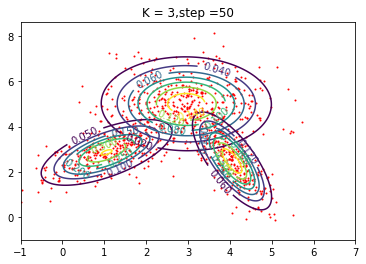

In [10]:
import numpy as np
from random import randint
from numpy import linalg
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
np.random.seed(1234)

def random_posdef(n):
    A = np.random.rand(n, n)
    return np.dot(A, A.transpose())

    

data = np.load('gmm_data.npy')  # 1000 * 2
sample_num = np.shape(data)[0]

# Parameter initialization ###
K_ = [3]
for K in K_:
    pi = [1.0/K for i in range(K)]
    means = [[0,0] for i in range(K)]
    covs = [random_posdef(2) for i in range(K)]
##############################
    for n in range(50):
        sum_gamma= 0
        for j in range(K):
            pdf_ = multivariate_normal(means[j], covs[j])
            sum_gamma += pi[j]*pdf_.pdf(data)
        for j in range(K):
            pdf_ = multivariate_normal(means[j], covs[j])
            gamma = pi[j]*pdf_.pdf(data)/sum_gamma
            
            means[j] = data.T@gamma / sum(gamma)
            covs[j] =  (gamma*(data - means[1]).T)@(data - means[j])/sum(gamma)
            pi[j] = sum(gamma)/sample_num

    x1 = np.linspace(-1, 7, 500)
    x2 = np.linspace(-1, 8, 500)
    X, Y = np.meshgrid(x1, x2)
    x_len = x1.shape[0]
    y_len = x2.shape[0]
    Z = np.zeros((x_len, y_len))
    
    for jj in range(K):
        pdf_= multivariate_normal(means[jj], covs[jj])
        print(means[jj],covs[jj])
        for i in range(x_len):
            for j in range(y_len):
                Z[j][i] = pdf_.pdf([x1[i],x2[j]])
        cs = plt.contour(x1, x2, Z)
        plt.clabel(cs, inline=0.1, fontsize=10)
    
    plt.scatter(data[:,0], data[:,1],s= 1, c = "r",label='data')
    plt.title('K = 3,step =50')
    #plt.show()
    plt.savefig("K=3,step=50.png")